In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('train.csv')

Percentage of Class 1 that survived: 63.0 %
Percentage of Class 2 that survived: 47.0 %
Percentage of Class 3 that survived: 24.0 %


,1,2,3
Survived,136,87,119
Died,80,97,372


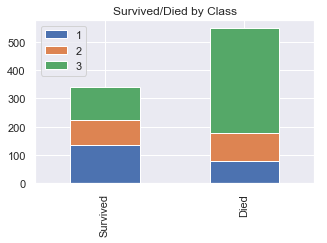

In [3]:
%matplotlib inline
import seaborn

seaborn.set()

# Survived/Died by Class

survived_class = dataset[dataset['Survived']==1]['Pclass'].value_counts()
dead_class = dataset[dataset['Survived']==0]['Pclass'].value_counts()
df_class = pd.DataFrame([survived_class, dead_class])
df_class.index = ['Survived', 'Died']
df_class.plot(kind='bar', stacked=True, figsize=(5,3), title='Survived/Died by Class')

Class1_survived= df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
Class2_survived = df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
Class3_survived = df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100

print("Percentage of Class 1 that survived:" ,round(Class1_survived),"%")
print("Percentage of Class 2 that survived:" ,round(Class2_survived), "%")
print("Percentage of Class 3 that survived:" ,round(Class3_survived), "%")

# Display table
from IPython.display import display
display(df_class)

Percentage of female that survived:  74.0 %
Percentage of male that survived 19.0 %


,female,male
Survived,233,109
Died,81,468


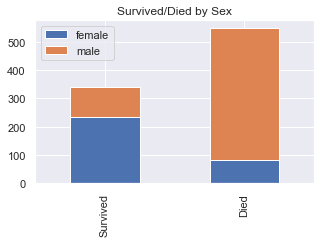

In [4]:
# Survived/Died by Sex

Survived = dataset[dataset['Survived']==1]['Sex'].value_counts()
Died = dataset[dataset['Survived']==0]['Sex'].value_counts()

df_sex = pd.DataFrame([Survived, Died])
df_sex.index = ['Survived', 'Died']
df_sex.plot(kind='bar', stacked=True, figsize=(5,3), title='Survived/Died by Sex')

female_survived = df_sex.female[0]/df_sex.female.sum()*100
male_survived = df_sex.male[0]/df_sex.male.sum()*100

print('Percentage of female that survived: ', round(female_survived), '%')
print('Percentage of male that survived', round(male_survived), '%')

# Display table
display(df_sex)

Percentage of Embark S that survived: 34.0 %
Percentage of Embark C that survived: 55.0 %
Percentage of Embark Q that survived: 39.0 %


,S,C,Q
Survived,217,93,30
Died,427,75,47


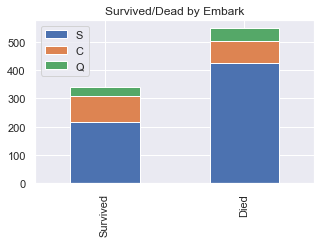

In [5]:
# Survived/Died by Embarked

survived_embark = dataset[dataset['Survived']==1]['Embarked'].value_counts()
dead_embark = dataset[dataset['Survived']==0]['Embarked'].value_counts()

df_embark = pd.DataFrame([survived_embark, dead_embark])
df_embark.index = ['Survived', 'Died']
df_embark.plot(kind='bar', stacked=True, figsize=(5,3), title='Survived/Dead by Embark')

Embark_S = df_embark.iloc[0,0]/df_embark.iloc[:,0].sum()*100
Embark_C = df_embark.iloc[0,1]/df_embark.iloc[:,1].sum()*100
Embark_Q = df_embark.iloc[0,2]/df_embark.iloc[:,2].sum()*100
print("Percentage of Embark S that survived:", round(Embark_S), "%")
print("Percentage of Embark C that survived:" ,round(Embark_C), "%")
print("Percentage of Embark Q that survived:" ,round(Embark_Q), "%")

# Display table
display(df_embark)

In [6]:
X = dataset.drop(['PassengerId', 'Cabin', 'Ticket', 'Fare', 'Parch', 'SibSp'], axis=1)
y = X.Survived

X = X.drop(['Survived'], axis=1)
X.head(20)

,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,3,"Allen, Mr. William Henry",male,35.0,S
5,3,"Moran, Mr. James",male,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C


In [7]:
# Encoding categorical data

# Encode "Sex"

from sklearn.preprocessing import LabelEncoder

labelEncoder_X = LabelEncoder()
X.Sex = labelEncoder_X.fit_transform(X.Sex)

# Encode "Embarked"

# Number of null values in Embarked:
print('Number of null values in Embarked : ', sum(X.Embarked.isnull()))

# Fill the two values with one of the options (S, C or Q)
row_index = X.Embarked.isnull()
X.loc[row_index, 'Embarked'] = 'S'

Embarked = pd.get_dummies(X.Embarked, prefix='Embarked')
X = X.drop(['Embarked'], axis=1)
X = pd.concat([X, Embarked], axis=1)

# We should drop one of the columns
X = X.drop(['Embarked_S'], axis=1)
X.head()

Number of null values in Embarked :  2


,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,"Braund, Mr. Owen Harris",1,22.0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0


Number of null values in age :  177


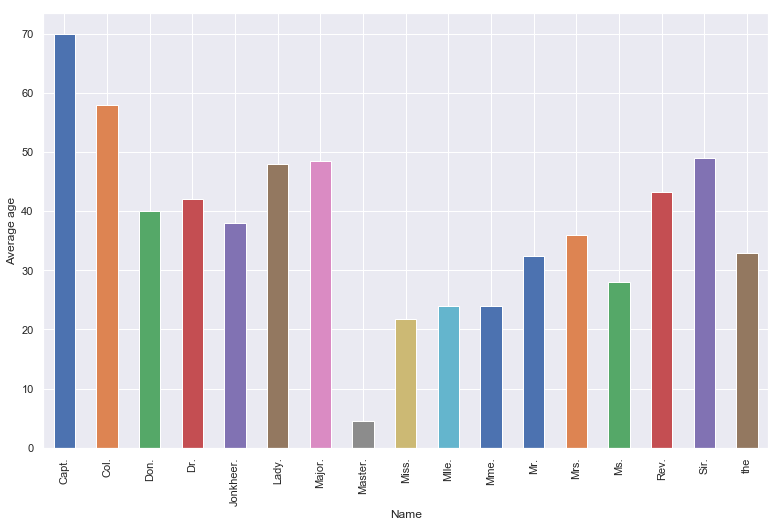

In [8]:
# Taking care of missing data

print('Number of null values in age : ', sum(X.Age.isnull()))

# Change Name -> Title
got = dataset.Name.str.split(',').str[1]
X.iloc[:,1] = pd.DataFrame(got).Name.str.split('\s+').str[1]

# Average age per title
ax = plt.subplot()
ax.set_ylabel('Average age')
X.groupby('Name').mean()['Age'].plot(kind='bar', figsize=(13,8), ax=ax)

title_mean_age = []
title_mean_age.append(list(set(X.Name))) # Set for unique values of the title and transform into list
title_mean_age.append(X.groupby('Name').Age.mean())

# Fill the missing ages
n_training = dataset.shape[0]
n_titles = len(title_mean_age[1])

for i in range(n_training):
    if np.isnan(X.Age[i])==True:
        for j in range(n_titles):
            if X.Name[i] == title_mean_age[0][j]:
                X.Age[i] = title_mean_age[1][j]
                
X = X.drop(['Name'], axis=1)

In [9]:
for i in range(n_training):
    if X.Age[i] > 18:
        X.Age[i] = 0

    else:
        X.Age[i] = 1
        
X.head()

,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,1,0.0,0,0
1,1,0,0.0,1,0
2,3,0,0.0,0,0
3,1,0,0.0,0,0
4,3,1,0.0,0,0


In [10]:
# Logistic Regression
# Fitting Logistic Regression to the training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', random_state=0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X, y=y, cv=10)
print('Logistic Regression:\n Accuracy:', accuracies.mean(), '+/-', accuracies.std(), '\n')

# K-NN
# Fitting K-NN to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X, y=y, cv=10)
print('K-NN:\n Accuracy:', accuracies.mean(), '+/-', accuracies.std(), '\n')

# SVM
# Fitting Kernel SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X, y=y, cv=10)
print('SVM:\n Accuracy:', accuracies.mean(), '+/-', accuracies.std(), '\n')

# Naive Bayes
# Fitting Naive Bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X, y=y, cv=10)
print('Naive Bayes:\n Accuracy:', accuracies.mean(), '+/-', accuracies.std(), '\n')

# Random Forest
# Fitting Random Forest to the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X, y=y, cv=10)
print('Random Forest:\nAccuracy:', accuracies.mean(), '+/-', accuracies.std(), '\n')

Logistic Regression:
 Accuracy: 0.7811678583588695 +/- 0.02594150466779637 

K-NN:
 Accuracy: 0.8103200544773579 +/- 0.031150858002374392 

SVM:
 Accuracy: 0.7855873340143003 +/- 0.026622568318719446 

Naive Bayes:
 Accuracy: 0.7767744864374079 +/- 0.02617976826959799 

Random Forest:
Accuracy: 0.8137033253887186 +/- 0.031741002619065845 

